In this notebook is reported an analysis of the values distribution of each feature

# Configuration

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Import the dataset

In [3]:
df = pd.read_csv('dataset/development.csv', index_col = 0)
df.head()

,YEAR,LOC,SN,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,NOX,CO
ID,,,,,,,,,,,,,,
0,2022,Austria,0903XTR,24.918,1006.8,55.697,3.3648,22.322,1071.5,550.03,119.83,11.171,-,1.07640
1,2022,Romania,0903XTR,14.332,1024.1,81.857,3.2767,20.049,1037.3,533.70,110.05,10.692,102.01,10.19600
2,2022,Sweden,0903XTR,11.548,1009.1,78.389,4.9142,28.616,1093.9,539.43,147.19,12.979,-,0.78407
3,2022,Finland,0903XTR,25.597,1003.0,77.744,3.2325,20.749,1062.1,549.95,112.79,10.624,52.225,1.61530
4,2022,Estonia,0903XTR,13.484,1011.1,96.477,4.1968,24.230,1086.1,550.08,133.71,11.921,71.915,1.40710


# CO emission analysis

### Univariate analysis

As first CO emission analysis let to observe the distriution.

In [63]:
df['CO'].describe()

count    24488.000000
mean         2.379069
std          2.270383
min          0.000388
25%          1.186750
50%          1.719450
75%          2.866625
max         44.103000
Name: CO, dtype: float64

In [93]:
within_quantiles = df[ (df['CO'] > df.CO.quantile(0.25)) & (df['CO'] < df.CO.quantile(0.75)) ].count()['CO']
within_quantiles / df['CO'].count()

0.5

Half of the CO values fall between the first and the third quantile

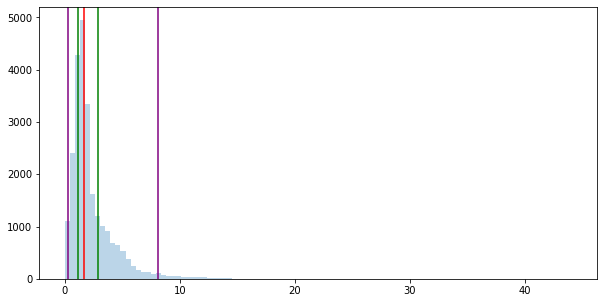

In [105]:
fig, ax = plt.subplots(figsize = (10,5))
_ = ax.hist(df['CO'].values, bins = 100, alpha = 0.3)      
ax.axvline(df['CO'].median(), c  = 'red')

#Green lines: 1st and 3rd quantiles
ax.axvline(df.CO.quantile(0.25), c = 'green')
ax.axvline(df.CO.quantile(0.75), c = 'green')

#Purple lines: 0.025 and 0.975 quantiles
ax.axvline(df.CO.quantile(0.025), c = 'purple')
ax.axvline(df.CO.quantile(0.975), c = 'purple')

In [102]:
round(df.CO.quantile([0.025,0.25,0.75,0.975]), 3)

0.025    0.315
0.250    1.187
0.750    2.867
0.975    8.117
Name: CO, dtype: float64

The CO emission values does not follow a normal distribution but seem to have an high concetration around small values. In particular between 0.315 and 8.117.

## Multivariate analysis

### CO vs YEAR

Text(0.5, 0.98, '')

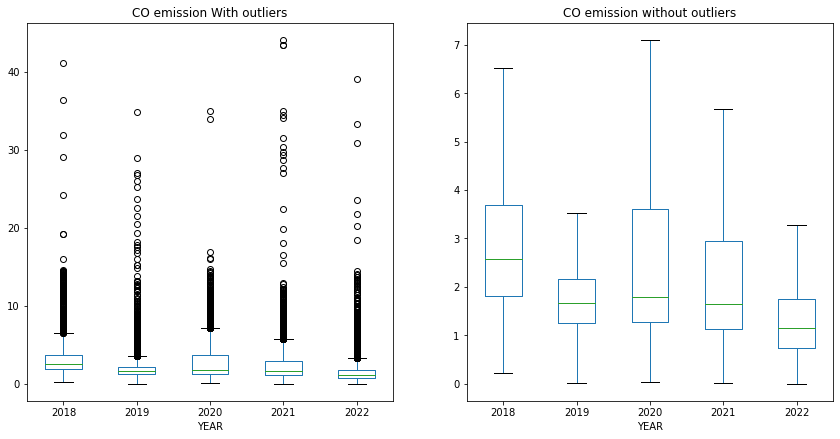

In [125]:
fig, [out, no_out] = plt.subplots(1,2, figsize= (14,7))

plt.tight_layout()

df.boxplot(column = 'CO', by = 'YEAR', showfliers = True, grid = False, ax = out)
out.set_title('CO emission With outliers')


df.boxplot(column = 'CO', by = 'YEAR', showfliers = False, grid = False, ax = no_out)
no_out.set_title('CO emission without outliers')

plt.suptitle('')

The CO emissions present decreasing trend for the meadian and the first quantile values. This may imply an improvement of the gas-turbine efficiency thanks to new tachnologies or strategies adopted. 

In [51]:
df[['CO', 'YEAR']].groupby('YEAR').describe()

CO                                                             \
       count      mean       std       min       25%      50%       75%   
YEAR                                                                      
2018  4877.0  3.130690  2.252167  0.212800  1.813000  2.57350  3.699100   
2019  4760.0  2.089425  1.930739  0.006915  1.257250  1.66510  2.168100   
2020  4759.0  2.751337  2.405253  0.029480  1.272950  1.78850  3.609850   
2021  5142.0  2.365469  2.512320  0.007505  1.121675  1.63890  2.948025   
2022  4950.0  1.573285  1.839435  0.000388  0.726328  1.14855  1.752750   

              
         max  
YEAR          
2018  41.097  
2019  34.820  
2020  35.045  
2021  44.103  
2022  39.050

### CO vs LOC

<AxesSubplot:title={'center':'CO'}, xlabel='LOC'>

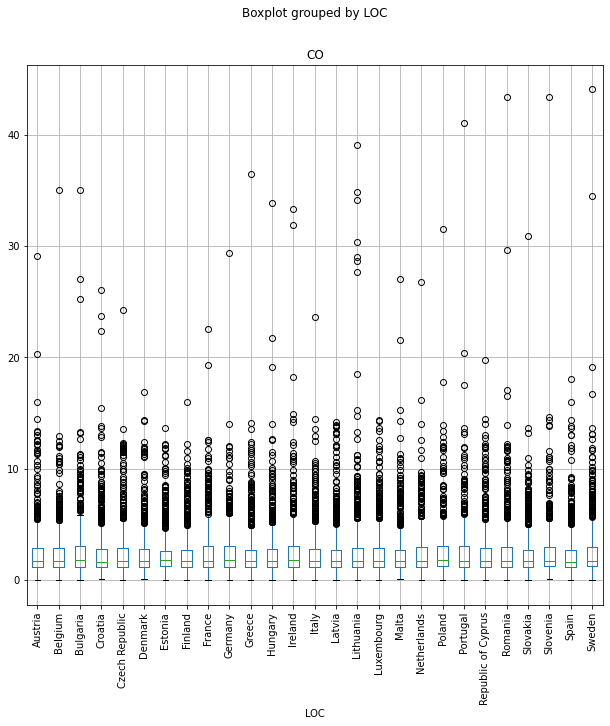

In [34]:
df.boxplot(column = 'CO', by = 'LOC', rot= 90, figsize = (10,10))

The boxplot describing CO emission with respect to the location (LOC) shows a constant meadian value. Probably the location will be not usefull during the analysis. As a further inspection we report also the statistics of CO emission grouped by countries.

In [38]:
by_countries_CO_stats = df[['CO','LOC']].groupby('LOC').describe()
by_countries_CO_stats

CO                                                   \
                    count      mean       std       min       25%      50%   
LOC                                                                          
Austria             869.0  2.396225  2.373099  0.010960  1.160000  1.71780   
Belgium             909.0  2.327204  2.166127  0.000388  1.155400  1.72070   
Bulgaria            888.0  2.489912  2.492534  0.042265  1.204775  1.76105   
Croatia             920.0  2.353900  2.338390  0.045731  1.183725  1.65695   
Czech Republic      937.0  2.381492  2.168382  0.020591  1.164500  1.69050   
Denmark             954.0  2.280000  1.949931  0.062556  1.179975  1.68500   
Estonia             845.0  2.284559  1.881075  0.006915  1.215700  1.75490   
Finland             867.0  2.289974  1.891694  0.027221  1.176800  1.70420   
France              872.0  2.429210  2.200943  0.003665  1.186850  1.71480   
Germany             960.0  2.353815  2.023082  0.035076  1.176100  1.76450   
Greece              947.0  2.312705  2.196780  0.016447  1.178400  1.72880   
Hungary             878.0  2.375815  2.296535  0.044665  1.201600  1.72025   
Ireland             876.0  2.477619  2.506142  0.007505  1.189250  1.78215   
Italy               910.0  2.332138  2.051564  0.013877  1.199950  1.71395   
Latvia              905.0  2.308665  2.072646  0.026562  1.166600  1.67690   
Lithuania           938.0  2.558181  3.265424  0.041929  1.172725  1.72900   
Luxembourg          853.0  2.394341  2.049718  0.019098  1.201600  1.71240   
Malta               955.0  2.316858  2.105545  0.051019  1.170650  1.72670   
Netherlands         855.0  2.369634  2.088505  0.018433  1.179900  1.74260   
Poland              837.0  2.442858  2.308612  0.037001  1.214100  1.77680   
Portugal            965.0  2.401878  2.393654  0.017149  1.165000  1.72160   
Republic of Cyprus  890.0  2.428440  2.180466  0.026376  1.196375  1.71470   
Romania             925.0  2.508321  2.675786  0.001594  1.208900  1.72520   
Slovakia            935.0  2.280816  1.994698  0.022105  1.195400  1.72630   
Slovenia            938.0  2.345568  2.279563  0.069452  1.224000  1.74560   
Spain               924.0  2.293435  2.025137  0.020066  1.172525  1.65930   
Sweden              936.0  2.510044  2.740395  0.008931  1.217075  1.71565   

                                      
                         75%     max  
LOC                                   
Austria             2.868200  29.084  
Belgium             2.845800  35.045  
Bulgaria            3.092050  35.019  
Croatia             2.757000  26.026  
Czech Republic      2.904700  24.239  
Denmark             2.757625  16.883  
Estonia             2.612000  13.657  
Finland             2.659100  16.022  
France              3.075900  22.511  
Germany             3.062175  29.341  
Greece              2.680350  36.454  
Hungary             2.802050  33.913  
Ireland             3.071675  33.346  
Italy               2.808125  23.629  
Latvia              2.713300  14.163  
Lithuania           2.895100  39.050  
Luxembourg          2.916400  14.354  
Malta               2.673350  26.999  
Netherlands         2.946300  26.752  
Poland              3.029800  31.538  
Portugal            3.082400  41.097  
Republic of Cyprus  2.887925  19.798  
Romania             2.928200  43.428  
Slovakia            2.724100  30.866  
Slovenia            2.963275  43.397  
Spain               2.711325  18.049  
Sweden              2.985300  44.103

### CO vs Natural Predictors

With the term natural predictors we indicate the AT, AP, and AH features.

In [128]:
df_nat = df[['AT','AP','AH','CO']]

In [143]:
df_nat.corr()['CO']

AT   -0.173731
AP    0.066065
AH    0.112168
CO    1.000000
Name: CO, dtype: float64

In [142]:
df_nat.corr('spearman')['CO']

AT   -0.111238
AP    0.030471
AH    0.085916
CO    1.000000
Name: CO, dtype: float64

No significant relationship between the CO emission values and the Natural Predictors.